# The simple model 8
Были добавленны свойства структур по теории Behler-Parrinello

In [ ]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.pipeline import Pipeline

!pip install matminer
!pip install pymatgen
!pip install maml
!git clone https://github.com/bvd757/3DSC.git

from pymatgen.core.structure import Structure
from maml.describers import BPSymmetryFunctions

In [ ]:
data = pd.read_csv('https://raw.githubusercontent.com/aimat-lab/3DSC/main/superconductors_3D/data/final/MP/3DSC_MP.csv', header = 1)
data_t = data[['tc']]
data

from matminer.featurizers.composition import ElementProperty
from matminer.featurizers.conversions import StrToComposition
ep_feat = ElementProperty.from_preset(preset_name="magpie")
d = {"element": np.array(data)[:, 0]}
df = pd.DataFrame(d)

df = StrToComposition().featurize_dataframe(df, "element")
df = ep_feat.featurize_dataframe(df, col_id = 'composition')

df["g1"] = np.zeros(len(df))
df["g2"] = np.zeros(len(df))
df["g3"] = np.zeros(len(df))
df["g4"] = np.zeros(len(df))
df["g5"] = np.zeros(len(df))
df["g6"] = np.zeros(len(df))
df["g7"] = np.zeros(len(df))
df["g8"] = np.zeros(len(df))
df

In [8]:
df

,element,composition,MagpieData minimum Number,MagpieData maximum Number,MagpieData range Number,MagpieData mean Number,MagpieData avg_dev Number,MagpieData mode Number,MagpieData minimum MendeleevNumber,MagpieData maximum MendeleevNumber,...,MagpieData avg_dev SpaceGroupNumber,MagpieData mode SpaceGroupNumber,g1,g2,g3,g4,g5,g6,g7,g8
0,Ag0.02Ge2Pd1.98Sr1,"(Ag, Ge, Pd, Sr)",32.0,47.0,15.0,38.804000,5.764800,32.0,8.0,79.0,...,0.000000,225.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,Ag0.15Sn0.85Te1,"(Ag, Sn, Te)",47.0,52.0,5.0,50.775000,1.225000,52.0,65.0,90.0,...,10.830000,152.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,Ag0.1Ge2Pd1.9Sr1,"(Ag, Ge, Pd, Sr)",32.0,47.0,15.0,38.820000,5.784000,32.0,8.0,79.0,...,0.000000,225.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,Ag0.1In0.9Te1,"(Ag, In, Te)",47.0,52.0,5.0,50.400000,1.600000,52.0,65.0,90.0,...,9.720000,152.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Ag0.2Ba1Si1.8,"(Ag, Ba, Si)",14.0,56.0,42.0,30.200000,19.440000,14.0,9.0,78.0,...,0.977778,227.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5768,Y1Zn1,"(Y, Zn)",30.0,39.0,9.0,34.500000,4.500000,30.0,12.0,69.0,...,0.000000,194.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5769,Yb1,(Yb),70.0,70.0,0.0,70.000000,0.000000,70.0,39.0,39.0,...,0.000000,225.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5770,Zn1,(Zn),30.0,30.0,0.0,30.000000,0.000000,30.0,69.0,69.0,...,0.000000,194.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5771,Zn2Zr1,"(Zn, Zr)",30.0,40.0,10.0,33.333333,4.444444,30.0,44.0,69.0,...,0.000000,194.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
discryper = BPSymmetryFunctions(cutoff = 6.0, r_etas = np.array([2]), r_shift = np.array([2]), a_etas = np.array([2]), 
                                zetas = np.array([2]), lambdas = np.array([1, -1]), feature_batch = 'pandas_concat')
p = pow(10, 10)
df1 = df.copy()
data_t1 = data_t.copy()
l = len(df1)
for i in enumerate(os.listdir(path="/content/3DSC/superconductors_3D/data/final/MP/cifs")):
    if i[0] == l: break
    #print("\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n", i[1], "\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n")
    cif = Structure.from_file("/content/3DSC/superconductors_3D/data/final/MP/cifs/" + i[1])
    if i[1][:i[1].find('-MP')] not in df1['element'].to_list(): continue
    j = df.loc[df['element'] == i[1][:i[1].find('-MP')]].index
    b = True
    while b: #Повторять пока b = True
        try:
            cit = discryper.transform_one(cif)
            df1['g1'][j] = (cit[0] * p).mean()
            df1['g2'][j] = (cit[1] * p).mean()
            df1['g3'][j] = (cit[2] * p).mean()
            df1['g4'][j] = (cit[3] * p).mean()
            df1['g5'][j] = (cit[4] * p).mean()
            df1['g6'][j] = (cit[5] * p).mean()
            df1['g7'][j] = (cit[6] * p).mean()
            df1['g8'][j] = (cit[7] * p).mean()
            
            b = False # если все хорошо прерываем цикл while
        except Exception: # иначе выполнится исключение и b останется True
            df1.drop(labels=j, axis=0, inplace=True)
            data_t1.drop(labels=j, axis=0, inplace=True)
            break

In [24]:
df1

,element,composition,MagpieData minimum Number,MagpieData maximum Number,MagpieData range Number,MagpieData mean Number,MagpieData avg_dev Number,MagpieData mode Number,MagpieData minimum MendeleevNumber,MagpieData maximum MendeleevNumber,...,MagpieData avg_dev SpaceGroupNumber,MagpieData mode SpaceGroupNumber,g1,g2,g3,g4,g5,g6,g7,g8
2,Ag0.1Ge2Pd1.9Sr1,"(Ag, Ge, Pd, Sr)",32.0,47.0,15.0,38.820000,5.784000,32.0,8.0,79.0,...,0.000000,225.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
4,Ag0.2Ba1Si1.8,"(Ag, Ba, Si)",14.0,56.0,42.0,30.200000,19.440000,14.0,9.0,78.0,...,0.977778,227.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
8,Ag0.55Hg0.45,"(Ag, Hg)",47.0,80.0,33.0,61.850000,16.335000,47.0,65.0,71.0,...,29.205000,225.0,3.522474e+09,2.323117e+09,1.323624e-14,1.581573e-15,4.782416e-15,4.205788e-16,1.008500e-15,1.751157e-16
9,Ag0.5Ba1Si1.5,"(Ag, Ba, Si)",14.0,56.0,42.0,33.500000,19.500000,14.0,9.0,78.0,...,1.111111,227.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
10,Ag0.5Pd0.5Th2,"(Ag, Pd, Th)",46.0,90.0,44.0,75.500000,19.333333,90.0,16.0,65.0,...,0.000000,225.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5764,W1O2,"(W, O)",8.0,74.0,66.0,30.000000,29.333333,8.0,51.0,87.0,...,96.444444,12.0,1.453629e+10,1.940457e+10,2.086519e-08,4.265664e-08,1.210296e-04,5.760231e-06,3.102789e-05,1.520952e-05
5766,W2Zr1,"(W, Zr)",40.0,74.0,34.0,62.666667,15.111111,74.0,44.0,51.0,...,15.555556,229.0,3.006712e+09,8.477980e+09,1.030798e-14,1.209183e-15,5.775883e-15,6.645428e-16,2.951720e-12,3.636866e-13
5767,W3O1,"(W, O)",8.0,74.0,66.0,57.500000,24.750000,74.0,51.0,87.0,...,81.375000,229.0,1.397170e+10,4.882945e+09,5.378185e-10,3.417309e-11,8.749552e-10,1.272783e-10,1.299678e-21,2.924279e-21
5768,Y1Zn1,"(Y, Zn)",30.0,39.0,9.0,34.500000,4.500000,30.0,12.0,69.0,...,0.000000,194.0,2.393869e+09,2.393869e+09,5.102213e-22,5.102213e-22,5.947575e-21,1.750803e-22,5.102213e-22,5.102213e-22


In [28]:
i = df1.loc[(df1['g1'] + df1['g2'] + df1['g3'] + df1['g4'] + df1['g5'] + df1['g6'] + df1['g7'] + df1['g8']) != 0].index
df2 = df1.loc[i]
data_t_2 = data_t1.loc[i]
df2 = (df2 - df2.mean()) / df2.std()
df2

<ipython-input-28-ff74e2bfaf83>:4: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df2 = (df2 - df2.mean()) / df2.std()


,MagpieData avg_dev AtomicWeight,MagpieData avg_dev Column,MagpieData avg_dev CovalentRadius,MagpieData avg_dev Electronegativity,MagpieData avg_dev GSbandgap,MagpieData avg_dev GSmagmom,MagpieData avg_dev GSvolume_pa,MagpieData avg_dev MeltingT,MagpieData avg_dev MendeleevNumber,MagpieData avg_dev NUnfilled,...,composition,element,g1,g2,g3,g4,g5,g6,g7,g8
8,0.458211,-1.775737,-1.133293,-1.248220,-0.594325,-0.34351,-0.295501,0.112064,-1.366303,-0.859726,...,NaN,NaN,-0.316967,-0.812233,-0.632708,-0.152405,-0.050036,-0.038479,-0.090557,-0.094680
11,-1.230221,-0.934274,-1.420691,-1.047400,-0.220690,-0.34351,0.275950,-0.754649,-0.701961,-0.613492,...,NaN,NaN,-0.655826,-0.996980,-0.376041,-0.152405,-0.050036,-0.038479,-0.090557,-0.094680
29,-1.166395,0.574324,0.122203,0.153536,-0.594325,-0.34351,0.200414,-1.052048,1.022110,3.598416,...,NaN,NaN,-0.704868,-0.923872,-0.349551,-0.152405,-0.050036,-0.038479,-0.090557,-0.094680
31,-1.407453,-1.511639,-1.505900,-1.098172,-0.594325,-0.34351,-0.513589,-0.319542,-1.196833,-0.028505,...,NaN,NaN,-0.505596,-0.746174,-0.632708,-0.152405,-0.050036,-0.038479,-0.090557,-0.094680
33,-1.186179,0.574324,0.204369,0.188686,-0.594325,-0.34351,0.189862,-0.956271,1.108314,0.439485,...,NaN,NaN,-0.721420,-0.925528,-0.370820,-0.152405,-0.050036,-0.038479,-0.090557,-0.094680
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5759,-0.883726,-1.856196,-1.000732,-0.883370,-0.594325,-0.34351,-0.440895,-1.378530,-1.621465,-0.937485,...,NaN,NaN,-0.305903,-0.927907,-0.632708,-0.152405,-0.050036,-0.038479,-0.090557,-0.094680
5764,1.708940,0.872319,1.512938,0.838949,-0.594325,-0.34351,-0.621492,3.637175,0.131340,-0.028505,...,NaN,NaN,1.038168,1.217559,-0.632708,-0.152405,-0.050036,-0.038432,-0.090555,-0.094673
5766,0.251868,-1.511639,-1.181294,0.734803,-0.594325,-0.34351,-0.599583,0.743698,-1.350084,-0.604492,...,NaN,NaN,-0.380426,-0.080850,-0.632708,-0.152405,-0.050036,-0.038479,-0.090557,-0.094680
5767,1.200970,0.406702,1.026029,0.487455,-0.594325,-0.34351,-0.740368,2.843351,-0.156005,-0.208501,...,NaN,NaN,0.968701,-0.508048,-0.632708,-0.152405,-0.050036,-0.038479,-0.090557,-0.094680


In [48]:
X_train, X_test, y_train, y_test = train_test_split(df2[['MagpieData mean AtomicWeight', 'MagpieData mean MeltingT',
'MagpieData mean Electronegativity', 'MagpieData mean NdValence', 'MagpieData mean GSvolume_pa', 
'MagpieData mean SpaceGroupNumber', 'MagpieData mean NdUnfilled', 'g1', 'g2', 'g3', 'g4', 'g5', 'g6', 'g7', 'g8']], data_t_2, test_size=0.3, random_state=85)

param_grid_rfr = { 
            "n_estimators"      : [30, 100, 300],
            "max_features"      : ["auto", "sqrt", "log2"],
            "min_samples_split" : [2,4,8],
            "bootstrap": [True, False],
            }
rfr = RandomForestRegressor()
CV_rfr = GridSearchCV(estimator = rfr, param_grid = param_grid_rfr, cv = 7)
CV_rfr.fit(X_train, y_train.values.ravel())

/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


GridSearchCV(cv=7, estimator=RandomForestRegressor(),
             param_grid={'bootstrap': [True, False],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_split': [2, 4, 8],
                         'n_estimators': [30, 100, 300]})

In [49]:
CV_rfr.best_params_

{'bootstrap': True,
 'max_features': 'sqrt',
 'min_samples_split': 2,
 'n_estimators': 30}

In [50]:
rfr1 = RandomForestRegressor(max_features = 'sqrt', min_samples_split = 2, bootstrap = True, n_estimators = 30)
rfr1.fit(X_train, y_train.values.ravel())
predictions = rfr1.predict(X_test)
predictions1 = rfr1.predict(X_train)
cross_val_score(rfr1, X_test, y_test, cv = 5)

/usr/local/lib/python3.9/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.9/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.9/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.9/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 

array([ 0.23486578, -0.28774367, -0.01798805,  0.09183783,  0.16460046])

/usr/local/lib/python3.9/dist-packages/pandas/core/internals/blocks.py:402: RuntimeWarning: divide by zero encountered in log
  result = func(self.values, **kwargs)
<ipython-input-51-e387e4187d00>:4: RuntimeWarning: divide by zero encountered in log
  plt.scatter(np.log(y_train), np.log(predictions1), color = 'blue', alpha = 0.05)


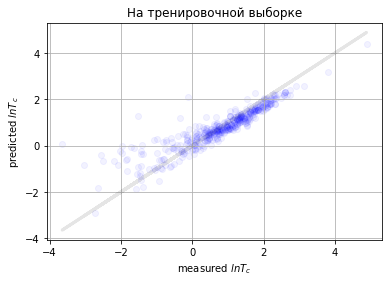

<ipython-input-51-e387e4187d00>:14: RuntimeWarning: divide by zero encountered in log
  plt.scatter(np.log(y_test), np.log(predictions), color = 'red', alpha = 0.05)


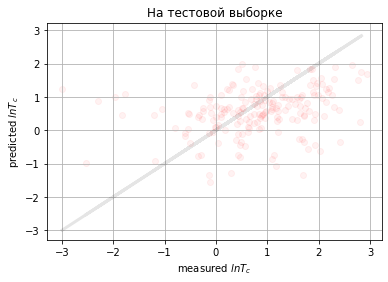

In [51]:
fig, ax = plt.subplots()
ax.grid()

plt.scatter(np.log(y_train), np.log(predictions1), color = 'blue', alpha = 0.05)
plt.plot(np.log(y_train), np.log(y_train), color = 'black', linewidth = 3, alpha = 0.1)
ax.set_xlabel('measured $ln T_c$')
ax.set_ylabel('predicted $ln T_c$')
plt.title("На тренировочной выборке")
#plt.ylim((0, 4))
plt.show()


plt.grid()
plt.scatter(np.log(y_test), np.log(predictions), color = 'red', alpha = 0.05)
plt.plot(np.log(y_test), np.log(y_test), color = 'black', linewidth = 3, alpha = 0.1)
plt.xlabel('measured $ln T_c$')
plt.ylabel('predicted $ln T_c$')
plt.title("На тестовой выборке")
#plt.ylim((0, 4))
plt.show()

In [55]:
A1 = np.array([ 0.27396661, -0.20361566, -0.08534573,  0.02678424,  0.07094797])
A2 = np.array([-0.06527448, -0.19937755, -0.16488693,  0.07318791, -0.14152555])
A3 = np.array([ 0.23486578, -0.28774367, -0.01798805,  0.09183783,  0.16460046])
print("Только старые признаки:", "среднее:", A1.mean())
print("Только структурные признаки:", "среднее:", A2.mean())
print("Все вместе:", "среднее:", A3.mean())

Только старые признаки: среднее: 0.016547486
Только структурные признаки: среднее: -0.09957532
Все вместе: среднее: 0.03711447


In [58]:
def plot_features_scores(model, data, target, column_names, model_type):
    '''Функция для визуализации важности признаков'''
    
    model.fit(data, target)
    
    if model_type == 'rf':
        (pd.DataFrame(data={'score': model['rf'].feature_importances_}, 
                      index=column_names).sort_values(by='score')
                                         .plot(kind='barh', grid=True,
                                               figsize=(6,6), legend=False));
    elif model_type == 'lr':
        (pd.DataFrame(data={'score': model['lr'].coef_[0]},
                      index=column_names).sort_values(by='score')
                                         .plot(kind='barh', grid=True,
                                               figsize=(6,6), legend=False));
        
    else:
        raise KeyError('Unknown model_type')

scores = [nan nan nan nan nan] 
mean score = nan +/- nan


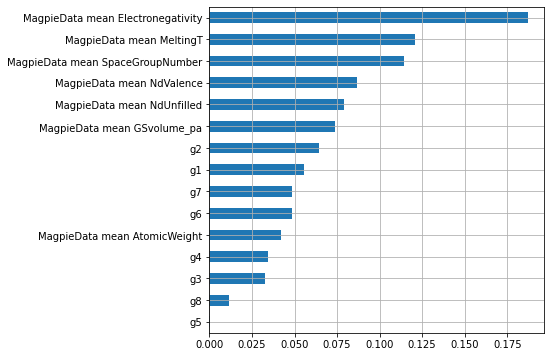

In [61]:
rf = Pipeline([('rf', rfr1)])

# параметры кросс-валидации (стратифицированная 5-фолдовая с перемешиванием) 

scores = cross_val_score(estimator=rf, X=X_test, y=predictions, scoring='roc_auc', n_jobs=-1)
print('scores = {} \nmean score = {:.5f} +/- {:.5f}'.format(scores, scores.mean(), scores.std()))

# важность признаков
plot_features_scores(model=rf, data=X_test, target=predictions, column_names=X_test.columns, model_type='rf')